In [135]:
import pandas as pd
import numpy as np

In [136]:
android = pd.read_csv("..\\..\\3-DataMerge\\2-SeparetedFramework\\android.csv", index_col=[0,1])
aws = pd.read_csv("..\\..\\3-DataMerge\\2-SeparetedFramework\\aws.csv", index_col=[0,1])
azure = pd.read_csv("..\\..\\3-DataMerge\\2-SeparetedFramework\\azure.csv", index_col=[0,1])
spring = pd.read_csv("..\\..\\3-DataMerge\\2-SeparetedFramework\\spring.csv", index_col=[0,1])

In [137]:
allMetricsAndQuestions = spring

## Normalização dos dados

In [138]:
AllMetricsAndQuestionsNormalized=(allMetricsAndQuestions-allMetricsAndQuestions.min())/(allMetricsAndQuestions.max()-allMetricsAndQuestions.min())

## Visão geral das métricas

In [139]:
AllMetricsAndQuestionsNormalized

AvgCyclomatic  AvgCyclomaticModified  AvgCyclomaticStrict  \
2013 4       0.584186               0.584186             0.584186   
     5       0.878781               0.878781             0.878781   
     6       0.669753               0.669753             0.669753   
     7       0.335678               0.335678             0.408615   
     8       0.378161               0.378161             0.499745   
...               ...                    ...                  ...   
2020 5       0.818287               0.818287             0.818287   
     6       0.000000               0.000000             0.000000   
     7       0.046296               0.046296             0.046296   
     8       0.665726               0.665726             0.672501   
     9       0.289352               0.289352             0.289352   

        AvgEssential   AvgLine  AvgLineBlank  AvgLineCode  AvgLineComment  \
2013 4      0.000000  0.448685      0.516541     0.431867        0.295509   
     5      0.541560  1.000000      1.000000     1.000000        0.616682   
     6      0.898958  0.624993      0.667225     0.640862        0.286998   
     7      0.888979  0.516701      0.426892     0.545500        0.187522   
     8      0.889639  0.508148      0.450004     0.530965        0.203176   
...              ...       ...           ...          ...             ...   
2020 5      0.900716  0.591861      0.586331     0.584463        0.437615   
     6      0.900716  0.445753      0.313397     0.417303        0.591350   
     7      0.900716  0.413088      0.364943     0.379042        0.440367   
     8      0.900716  0.491944      0.359746     0.504353        0.341821   
     9      0.900716  0.458842      0.399994     0.457267        0.290170   

        CountClassBase  CountClassCoupled  ...  PercentLackOfCohesion  \
2013 4        0.000000           0.503768  ...               0.031784   
     5        0.199519           0.538792  ...               0.151168   
     6        0.192444           0.466464  ...               0.273835   
     7        0.161764           0.639490  ...               0.512970   
     8        0.168067           0.593136  ...               0.508071   
...                ...                ...  ...                    ...   
2020 5        0.520622           0.829450  ...               0.361856   
     6        0.186029           0.353108  ...               0.538905   
     7        0.265756           0.277759  ...               0.548621   
     8        0.354071           0.420578  ...               0.349983   
     9        0.269077           0.356433  ...               0.391087   

        PercentLackOfCohesionModified  RatioCommentToCode  SumCyclomatic  \
2013 4                       0.032534            0.081177       0.086710   
     5                       0.154735            0.133000       0.154414   
     6                       0.280297            0.051295       0.226977   
     7                       0.525075            0.025415       0.381726   
     8                       0.519573            0.024139       0.350991   
...                               ...                 ...            ...   
2020 5                       0.369215            0.204173       0.997235   
     6                       0.548083            0.145588       0.709381   
     7                       0.557775            0.121057       0.614839   
     8                       0.355221            0.096790       0.464472   
     9                       0.398040            0.205751       0.529387   

        SumCyclomaticModified  SumCyclomaticStrict  SumEssential  \
2013 4               0.086710             0.079471      0.044361   
     5               0.154414             0.141522      0.109601   
     6               0.226977             0.208027      0.229304   
     7               0.381726             0.358294      0.355912   
     8               0.350991             0.335753      0.320176   
...                       ...                  ...      

### Gráfico do número de arquivos Java

In [140]:
time = pd.DataFrame(AllMetricsAndQuestionsNormalized.index.values.tolist(), columns=['year','month'])
time["day"] = 1
time

,year,month,day
0,2013,4,1
1,2013,5,1
2,2013,6,1
3,2013,7,1
4,2013,8,1
...,...,...,...
84,2020,5,1
85,2020,6,1
86,2020,7,1
87,2020,8,1


In [141]:
allMetricsAndQuestions.set_index(pd.to_datetime(time), inplace=True)
AllMetricsAndQuestionsNormalized.set_index(pd.to_datetime(time), inplace=True)

# Plotting only metrics

In [142]:
def plot(data, title, metric, ylabel, xlabel):
    subplot = data.plot(figsize=(15,5), fontsize=20)
    subplot.set_title(title, fontsize=25)
    subplot.set_ylabel(ylabel, fontsize=20)
    subplot.set_xlabel(xlabel, fontsize=20)
    #     subplot.figure.savefig(metric+".pdf",bbox_inches = 'tight')

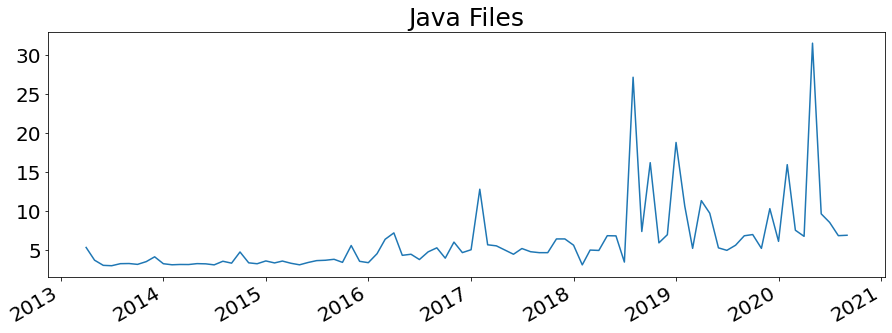

In [143]:
plot(allMetricsAndQuestions["numberJavaFiles"], "Java Files", "Java Files", "", "")

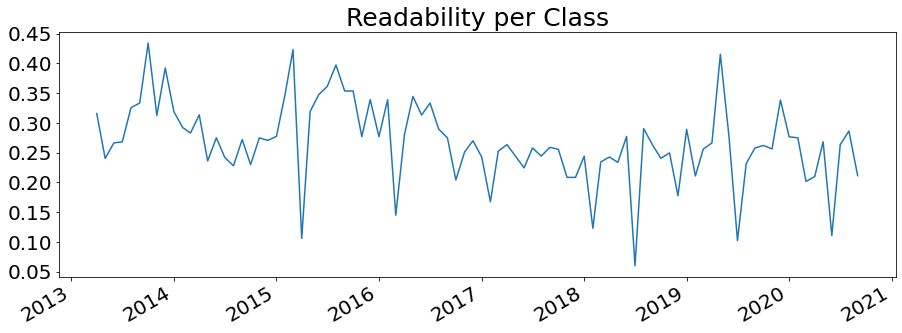

In [144]:
plot(allMetricsAndQuestions["readability"], "Readability per Class", "", "", "")

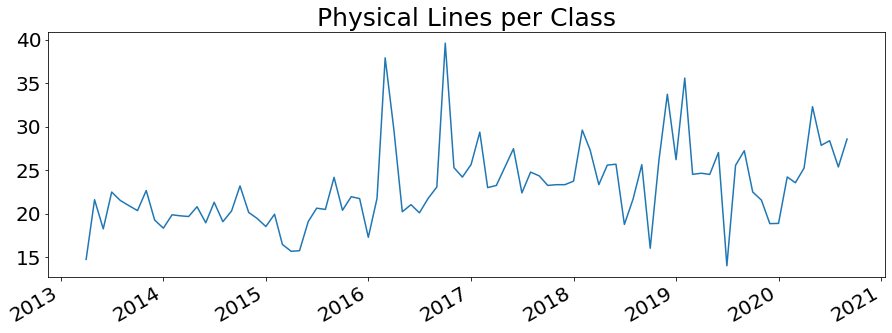

In [145]:
plot(allMetricsAndQuestions["CountLine"], "Physical Lines per Class", "", "", "")

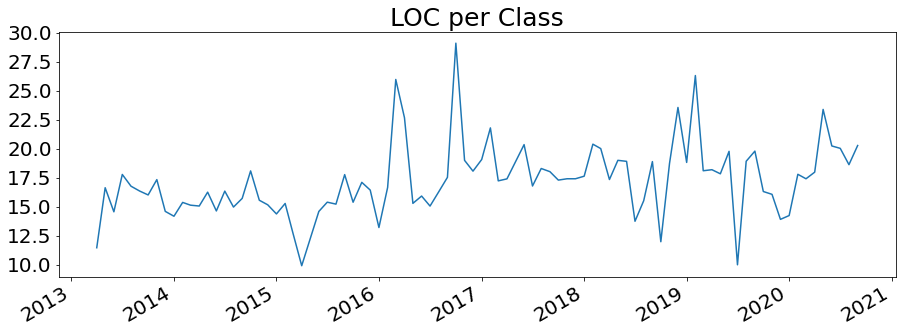

In [146]:
plot(allMetricsAndQuestions["CountLineCode"], "LOC per Class", "LOC per Class", "", "")

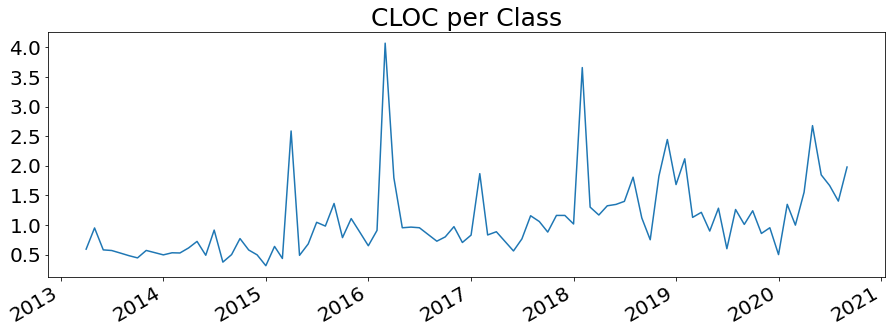

In [147]:
plot(allMetricsAndQuestions["CountLineComment"], "CLOC per Class", "", "", "")

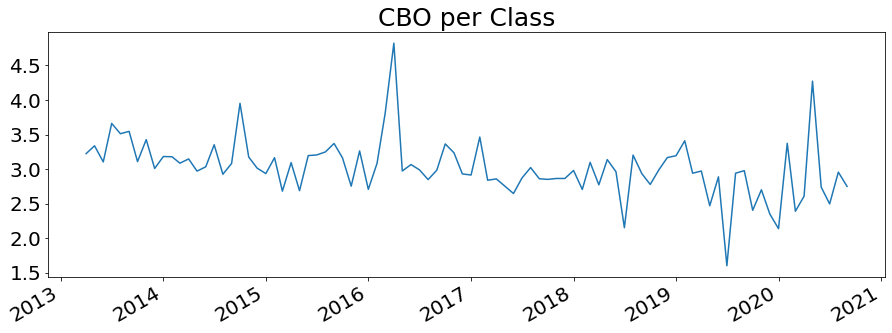

In [148]:
plot(allMetricsAndQuestions["CountClassCoupled"], "CBO per Class", "", "", "")

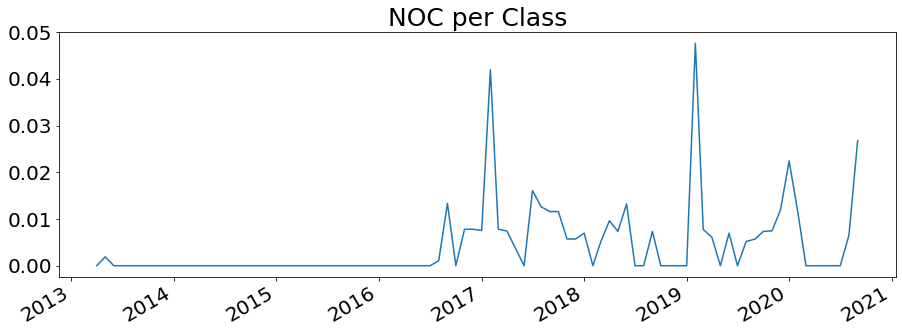

In [149]:
plot(allMetricsAndQuestions["CountClassDerived"], "NOC per Class", "", "", "")

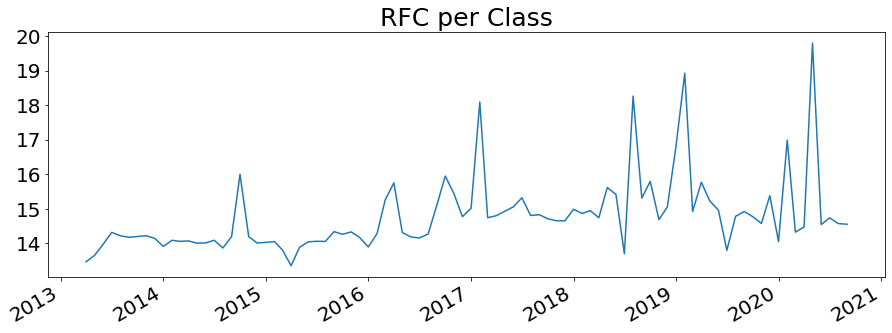

In [150]:
plot(allMetricsAndQuestions["CountDeclMethodAll"], "RFC per Class", "", "", "")

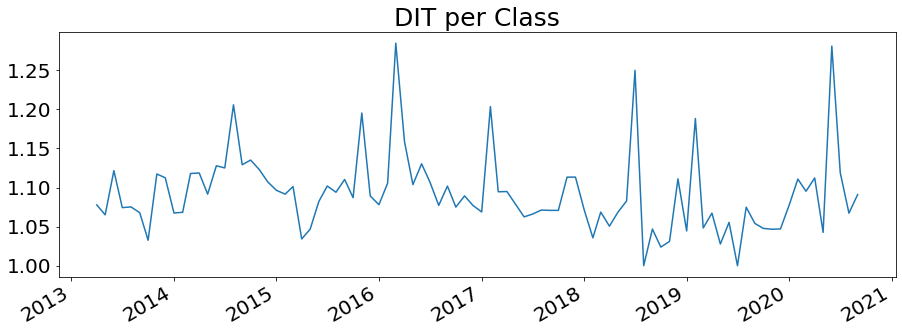

In [151]:
plot(allMetricsAndQuestions["MaxInheritanceTree"], "DIT per Class", "", "", "")

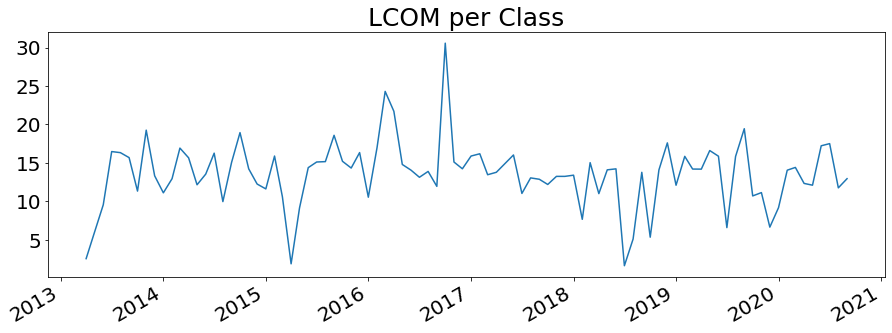

In [152]:
plot(allMetricsAndQuestions["PercentLackOfCohesion"], "LCOM per Class", "", "", "")

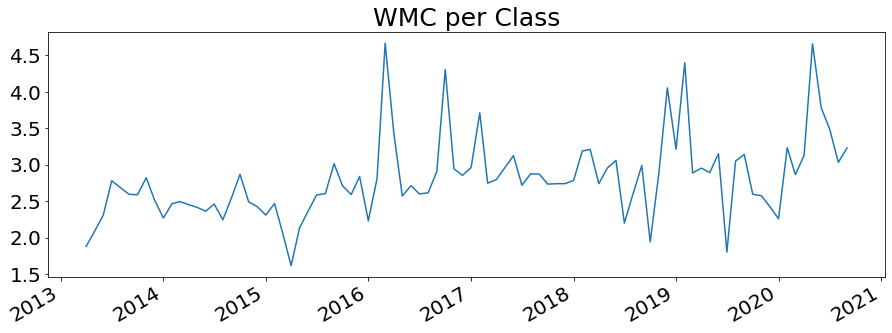

In [153]:
plot(allMetricsAndQuestions["SumCyclomatic"], "WMC per Class", "", "", "")

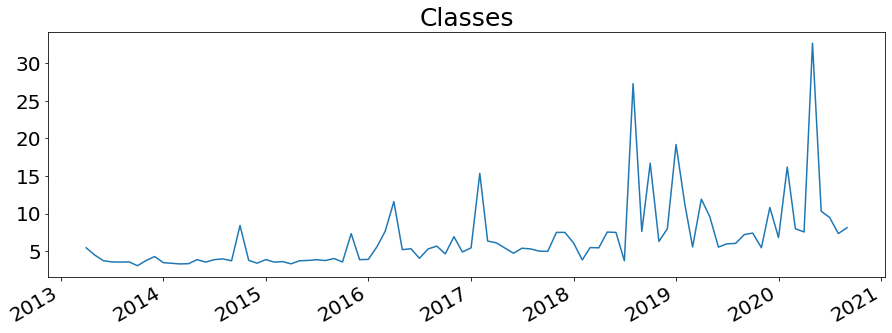

In [154]:
plot(allMetricsAndQuestions["CountDeclClass"], "Classes", "", "", "")

# Plotting metrics and questions

In [155]:
def plot(metrics, questions, metric, title, ylabel, xlabel):
    subplot = metrics.plot(figsize=(15,5), fontsize=20, legend=True, label=metric)
    subplot = questions.plot(figsize=(15,5), fontsize=20, legend=True, label="Questions")
    subplot.set_title(title, fontsize=25)
    subplot.set_ylabel(ylabel, fontsize=20)
    subplot.set_xlabel(xlabel, fontsize=20)
    #     subplot.figure.savefig(metric+".pdf",bbox_inches = 'tight')

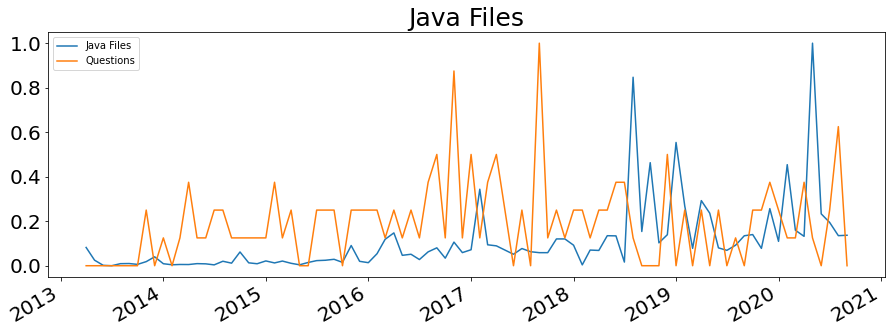

In [156]:
plot(AllMetricsAndQuestionsNormalized["numberJavaFiles"], AllMetricsAndQuestionsNormalized["questions"], "Java Files", "Java Files", "", "")

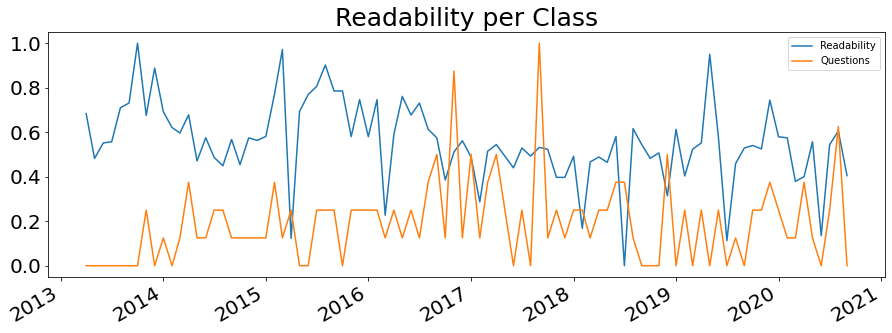

In [157]:
plot(AllMetricsAndQuestionsNormalized["readability"], AllMetricsAndQuestionsNormalized["questions"], "Readability", "Readability per Class", "", "")

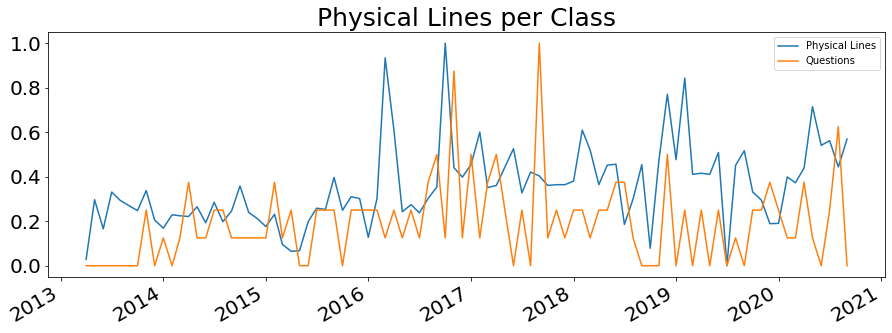

In [158]:
plot(AllMetricsAndQuestionsNormalized["CountLine"], AllMetricsAndQuestionsNormalized["questions"], "Physical Lines", "Physical Lines per Class", "", "")

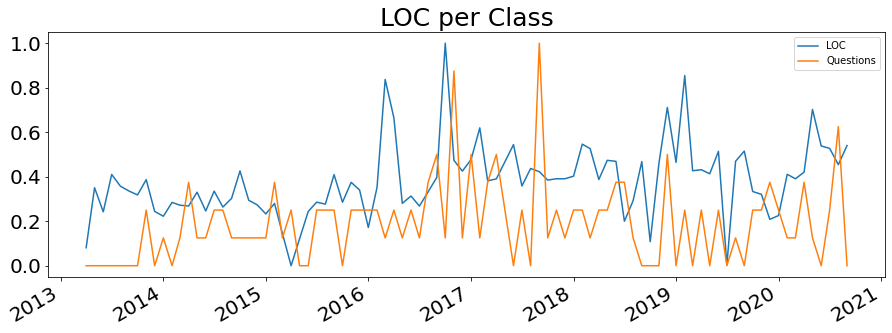

In [159]:
plot(AllMetricsAndQuestionsNormalized["CountLineCode"], AllMetricsAndQuestionsNormalized["questions"], "LOC", "LOC per Class", "", "")

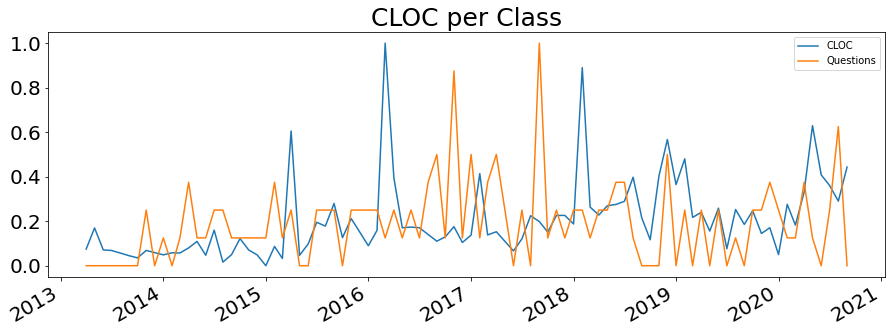

In [160]:
plot(AllMetricsAndQuestionsNormalized["CountLineComment"], AllMetricsAndQuestionsNormalized["questions"], "CLOC", "CLOC per Class", "", "")

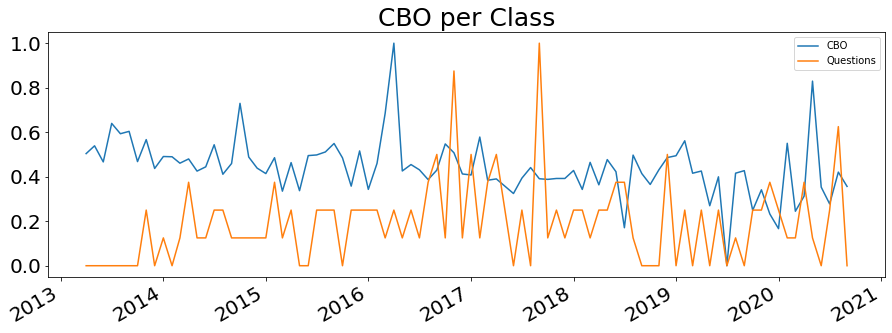

In [161]:
plot(AllMetricsAndQuestionsNormalized["CountClassCoupled"], AllMetricsAndQuestionsNormalized["questions"], "CBO", "CBO per Class", "", "")

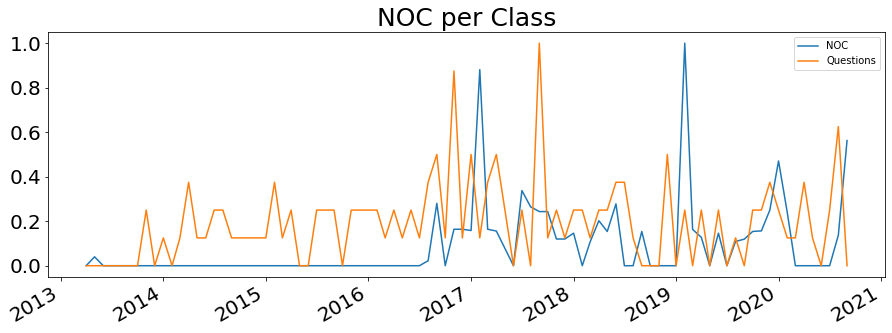

In [162]:
plot(AllMetricsAndQuestionsNormalized["CountClassDerived"], AllMetricsAndQuestionsNormalized["questions"], "NOC", "NOC per Class", "", "")

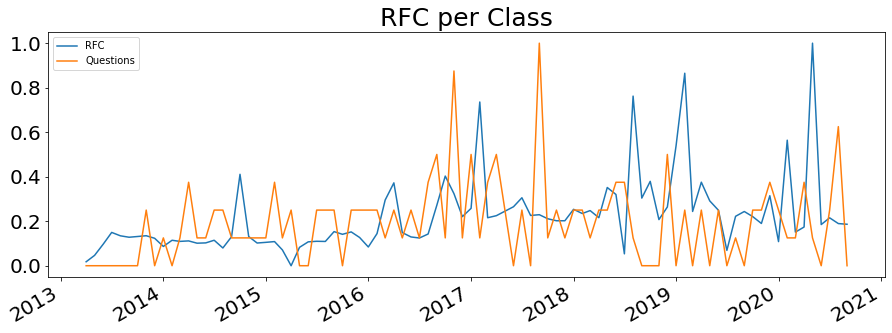

In [163]:
plot(AllMetricsAndQuestionsNormalized["CountDeclMethodAll"], AllMetricsAndQuestionsNormalized["questions"], "RFC", "RFC per Class", "", "")

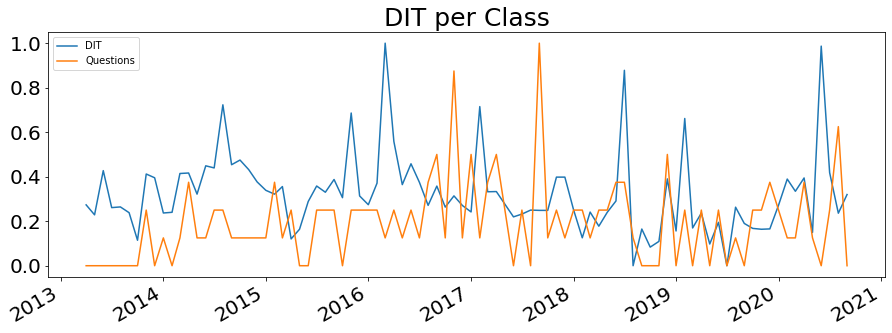

In [164]:
plot(AllMetricsAndQuestionsNormalized["MaxInheritanceTree"], AllMetricsAndQuestionsNormalized["questions"], "DIT", "DIT per Class", "", "")

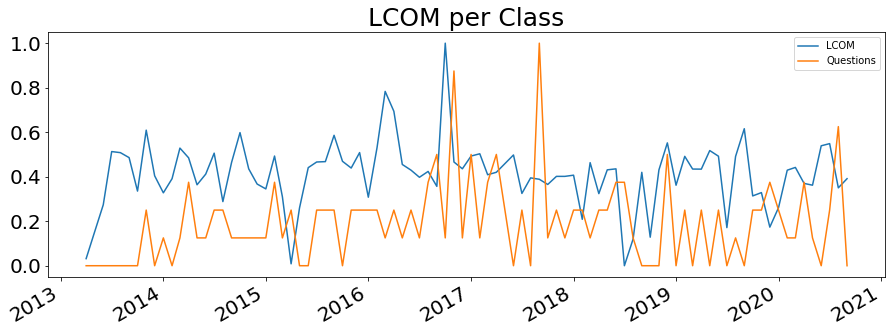

In [165]:
plot(AllMetricsAndQuestionsNormalized["PercentLackOfCohesion"], AllMetricsAndQuestionsNormalized["questions"], "LCOM", "LCOM per Class", "", "")

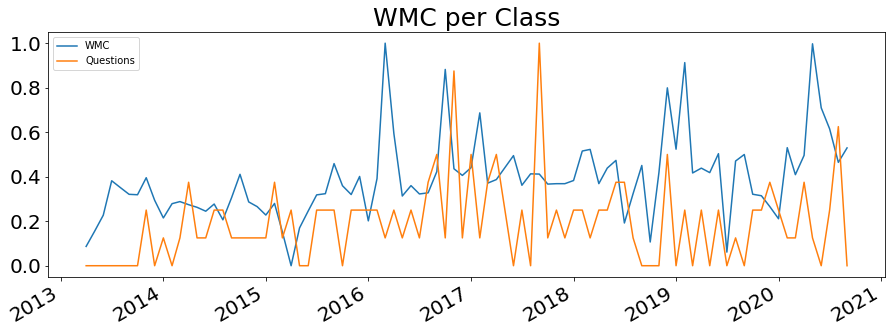

In [166]:
plot(AllMetricsAndQuestionsNormalized["SumCyclomatic"], AllMetricsAndQuestionsNormalized["questions"], "WMC", "WMC per Class", "", "")

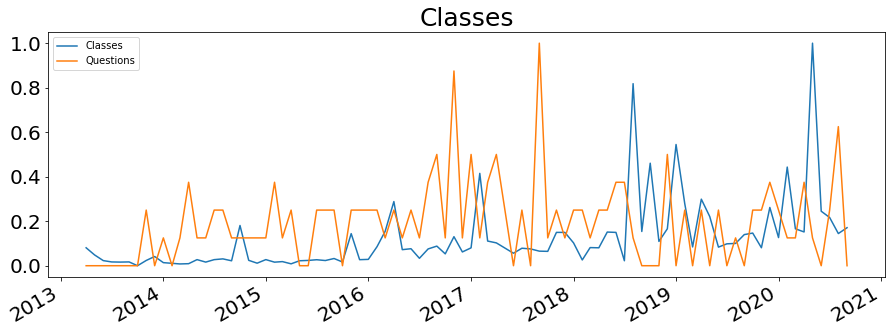

In [167]:
plot(AllMetricsAndQuestionsNormalized["CountDeclClass"], AllMetricsAndQuestionsNormalized["questions"], "Classes", "Classes", "", "")